In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ratmetab
import os
if os.getlogin() == 'jonesa7':
    import attila_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
data = ratmetab.read_all_data()
blood_data = data['blood']
blood_data['Group'] = pd.Categorical(blood_data.Group, ordered=True, categories=['Y', 'AU', 'AI'])
blood_data

,LIscore,Group,Cholic acid,Chenodeoxycholic acid,Deoxycholic acid,Glycocholic acid,Glycochenodeoxycholic acid,Glycodeoxycholic acid,Hyodeoxycholic acid,Lithocholic acid,...,Dihydroceramide C22:1,Dihydroceramide C23:1,2-Hydroxyacyldihydroceramide C24:0,Dihydroceramide C26:0,Dihydroceramide C27:0,Dihydroceramide C28:0,Phosphatidylethanolamine aa 38:3,Phosphatidylserine aa 36:1,Phosphatidylserine aa 36:2,Glycoursodeoxycholic acid
idno,,,,,,,,,,,,,,,,,,,,,
105,249,AI,0.4630,0.0561,0.1350,0.2710,0.0398,0.00996,0.464,0.00851,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1158,201,AU,0.1400,0.2750,1.1000,0.1960,0.0482,0.02940,3.850,0.02990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1172,155,AU,0.0855,NaN,0.2630,1.8300,0.0577,0.01180,0.918,0.01710,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1174,194,AU,NaN,NaN,0.4350,0.3720,0.0157,0.00993,0.728,0.00929,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,291,AI,0.4480,0.0651,0.0117,0.2670,0.0182,NaN,0.110,0.01800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,200,Y,2.2700,0.3570,0.1690,0.1340,0.0138,0.00313,0.600,0.05220,...,NaN,0.00501,0.00147,0.00222,NaN,NaN,1.167,NaN,NaN,NaN
298,212,Y,8.2200,1.9500,0.2720,0.0968,0.0136,0.00446,0.726,0.02940,...,0.00492,NaN,NaN,0.00475,0.00619,0.00086,NaN,0.608,NaN,NaN
427,218,Y,4.6800,3.1200,0.2630,0.2740,0.1090,0.05190,1.660,0.02790,...,0.00487,NaN,0.00215,0.00731,NaN,NaN,1.482,0.263,NaN,NaN


In [4]:
def extract_metab(metab, data=blood_data):
    df = data.loc[:, ['Group', metab]]
    return(df)

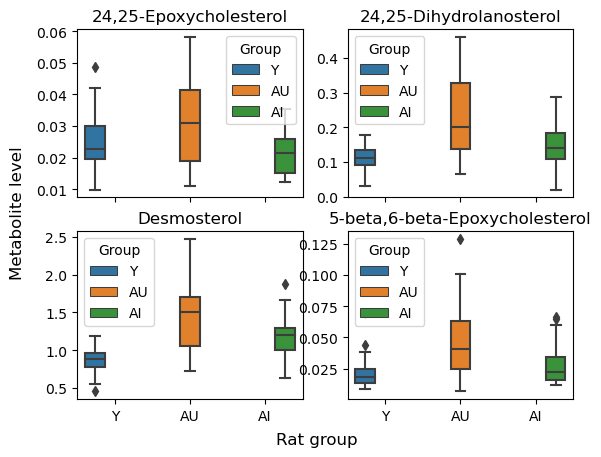

In [7]:
fig, ax = plt.subplots(2, 2, sharex=True)
top_metabolites = ['24,25-Epoxycholesterol', '24,25-Dihydrolanosterol', 'Desmosterol', '5-beta,6-beta-Epoxycholesterol']

for axi, metab in zip(np.ravel(ax), top_metabolites):
    sns.boxplot(x='Group', y=metab, hue='Group', data=extract_metab(metab), ax=axi, labels=None)
    axi.set_xlabel('')
    axi.set_ylabel('')
    axi.set_title(metab)

if os.getlogin() == 'jonesa7':
    fig.supxlabel('Rat group')
    fig.supylabel('Metabolite level')

In [6]:
%connect_info

{
  "shell_port": 59942,
  "iopub_port": 59943,
  "stdin_port": 59944,
  "control_port": 59946,
  "hb_port": 59945,
  "ip": "127.0.0.1",
  "key": "2dd28894-8e7d469cae198b750e36b50f",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-f9507c69-4741-4d41-a082-0a67a60ff7bb.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
